# Exploration 1

### 학습 목표
- scikit-learn에 내장된 예제 데이터셋의 종류를 알고 활용할 수 있다.
- scikit-learn에 내장된 분류 모델들을 학습시키고 예측해 볼 수 있다.
- 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.
- Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.
- 데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.

### 목차

[1. load_digits: 손글씨 분류](#1.-load_digits:-손글씨-분류) <br>
[2. load_wine: 와인 분류](#2.-load_wine:-와인-분류) <br>
[3. load_breast_cancer: 유방암 여부 진단](#3.-load_breast_cancer:-유방암-여부-진단) <br>
[회고](#회고)

---

## 1. load_digits: 손글씨 분류

### (1) 필요한 모듈 import

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비
`load_digits` 메서드 사용

In [2]:
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### (3) 데이터 이해
- Feature data 지정
- Label data 지정
- Target names 출력
- 데이터 describe

In [4]:
X = digits.data # feature data
y = digits.target # label data

In [5]:
digits.target_names # target names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

라벨은 0 ~ 9 사이의 정수로 구성되어 있다.

<AxesSubplot:ylabel='count'>

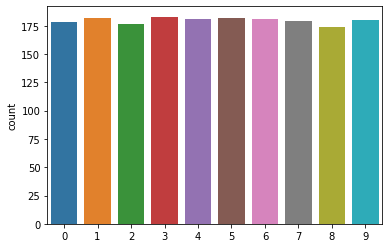

In [6]:
import seaborn as sns

sns.countplot(x=y)

라벨이 비교적 고르게 분포되어 있다.

In [7]:
print(X.shape)
print(X[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


데이터는 총 1797개 있으며, 각각은 64개의 정수로 구성되어 있다.

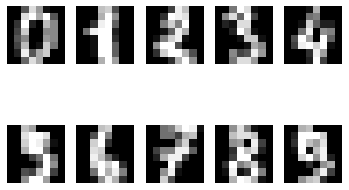

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

각 데이터는 0~9 사이의 숫자를 나타낸 이미지이다. <br/>

### (4) train, test 데이터 분리
`stratify=y`를 추가하여 데이터가 라벨 별로 기존 데이터의 라벨 분포와 같이 나눠지도록 한다

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

### (5) 다양한 모델로 학습
- Decision Tree
- Random Forest
- SVM
- SGD Classifier
- Logistic Regression

각 모델에 대한 설명(파라미터 등)은 jupyter 노트북 상에서는 `shift`+`tab`을 통해 확인할 수 있다. <br>

#### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.84      0.72      0.78        36
           2       0.78      0.80      0.79        35
           3       0.79      0.81      0.80        37
           4       0.86      0.86      0.86        36
           5       0.88      0.95      0.91        37
           6       0.81      0.83      0.82        36
           7       0.84      0.86      0.85        36
           8       0.71      0.69      0.70        35
           9       0.82      0.75      0.78        36

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



#### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# vanila model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.90      0.97      0.93        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



#### SVM

In [13]:
from sklearn.svm import SVC

# vanila model
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### SGD Classifier

In [14]:
from sklearn.linear_model import SGDClassifier

# vanila model
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.95      1.00      0.97        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       0.95      0.97      0.96        36
           7       0.90      0.97      0.93        36
           8       0.91      0.83      0.87        35
           9       1.00      0.89      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.95       360
weighted avg       0.96      0.96      0.96       360



#### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# vanila model
lr = LogisticRegression(max_iter=3000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      0.86      0.89        36
           2       1.00      1.00      1.00        35
           3       0.95      1.00      0.97        37
           4       0.97      1.00      0.99        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       0.97      0.97      0.97        36
           8       0.86      0.89      0.87        35
           9       0.97      0.94      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### (6) 모델 평가
- 테스트 데이터 예측 결과를 어떻게 해석해야할지
- 모델의 성능을 평가하는 지표로 무엇이 좋을지
- `sklearn.metrics`에서 제공하는 평가지표 중 적절한 것을 선택, 선택한 이유

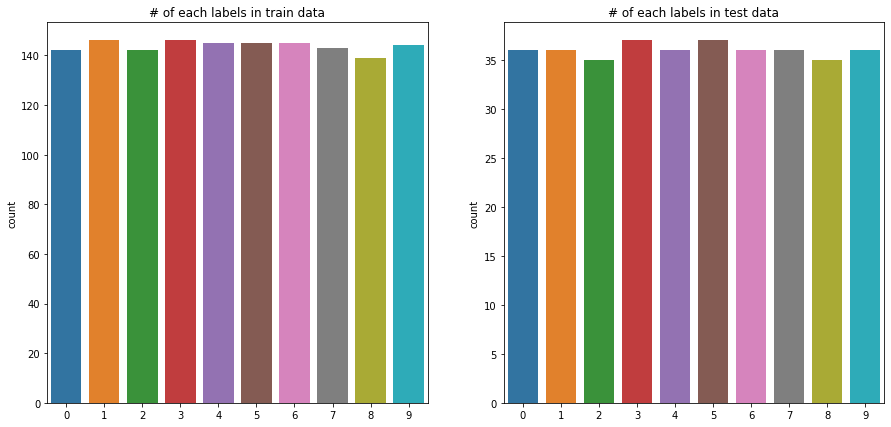

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].set_title("# of each labels in train data")
sns.countplot(x=y_train, ax=axes[0]);\
axes[1].set_title("# of each labels in test data")
sns.countplot(x=y_test, ax=axes[1]);

전체 라벨이 비교적 고르게 분포되어 있으므로 `accuracy_score`를 사용해도 될 것 같다

In [17]:
# accuracy score 불러오기
from sklearn.metrics import accuracy_score

#### Decision Tree

In [18]:
print(f'Accuracy of Decision Tree: {accuracy_score(y_test, y_pred_dt)}')

Accuracy of Decision Tree: 0.825


#### Random Forest

In [19]:
print(f'Accuracy of Random Forest: {accuracy_score(y_test, y_pred_rf)}')

Accuracy of Random Forest: 0.9611111111111111


#### SVM

In [20]:
print(f'Accuracy of SVM: {accuracy_score(y_test, y_pred_svm)}')

Accuracy of SVM: 0.9916666666666667


#### SGD Classifier

In [21]:
print(f'Accuracy of SGD Classifier: {accuracy_score(y_test, y_pred_sgd)}')

Accuracy of SGD Classifier: 0.9555555555555556


#### Logistic Regression

In [22]:
print(f'Accuracy of Logistic Regression: {accuracy_score(y_test, y_pred_lr)}')

Accuracy of Logistic Regression: 0.9611111111111111


---

## 2. load_wine: 와인 분류

### (1) 필요한 모듈 import

In [23]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### (2) 데이터 준비
`load_wine` 메서드 사용

In [24]:
wine = load_wine()

In [25]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

### (3) 데이터 이해하기
- Feature Data 지정
- Label Data 지정
- Target Names 출력
- 데이터 Describe

In [26]:
X = wine.data # feature data
y = wine.target # label data

In [27]:
wine.target_names # target names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

`class_0`, `class_1`, `class_2` 총 세 개의 클래스로 구성되어 있다.

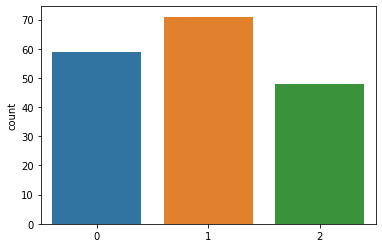

In [28]:
import seaborn as sns

sns.countplot(x=y);

라벨의 수가 불균형하다. (1 > 0 > 2 순서)

In [29]:
wine.feature_names # feature names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [30]:
# 데이터프레임으로 만들기
df = pd.DataFrame(X, columns=wine.feature_names)
df["label"] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [32]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


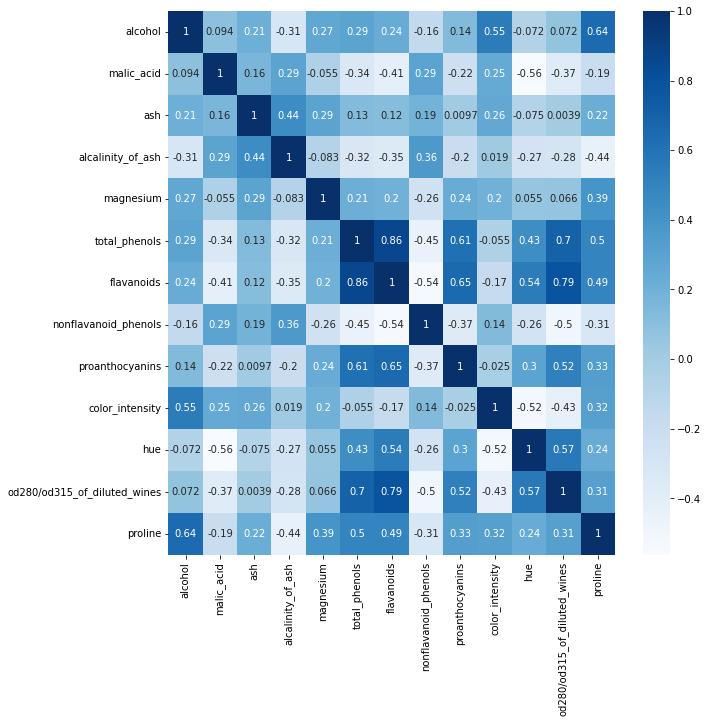

In [33]:
corr = df.iloc[:, :-1].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="Blues");

상관계수가 큰 feature들이 존재한다. 우선은 그냥 알아만 두고 넘어간다.

### (4) train, test 데이터 분리

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

### (5) 다양한 모델로 학습

#### Decision Tree

In [36]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



#### Random Forest

In [37]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### SVM

In [38]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.61      1.00      0.76        14
           2       0.00      0.00      0.00        10

    accuracy                           0.69        36
   macro avg       0.51      0.64      0.56        36
weighted avg       0.54      0.69      0.60        36



#### SGD Classifier

In [39]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      0.43      0.60        14
           2       0.53      1.00      0.69        10

    accuracy                           0.75        36
   macro avg       0.84      0.78      0.75        36
weighted avg       0.87      0.75      0.74        36



#### Logistic Regression

In [40]:
lr = LogisticRegression(max_iter=2500, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### (6) 모델 평가

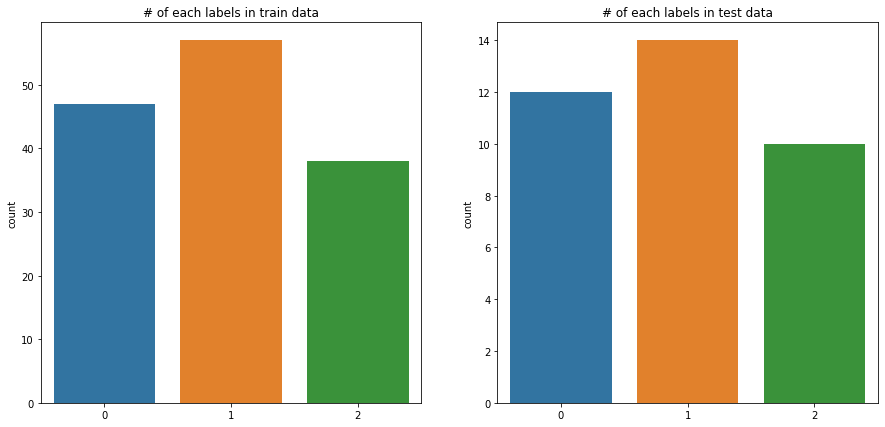

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].set_title("# of each labels in train data")
sns.countplot(x=y_train, ax=axes[0]);\
axes[1].set_title("# of each labels in test data")
sns.countplot(x=y_test, ax=axes[1]);

라벨의 비율이 불균형하다. 따라서 불균형한 데이터에 더 맞는 `f1-score`를 사용한다. 그 중 `micro f1-score`를 사용한다. <br>
이유는 [링크](https://junklee.tistory.com/116) 참고

In [42]:
# fl_score 불러오기
from sklearn.metrics import f1_score

#### Decision Tree

In [43]:
print(f'Micro F1 Score of Decision Tree: {f1_score(y_test, y_pred_dt, average="micro")}')

Micro F1 Score of Decision Tree: 0.9444444444444444


#### Random Forest

In [44]:
print(f'Micro F1 Score of Random Forest: {f1_score(y_test, y_pred_rf, average="micro")}')

Micro F1 Score of Random Forest: 1.0


#### SVM

In [45]:
print(f'Micro F1 Score of SVM: {f1_score(y_test, y_pred_svm, average="micro")}')

Micro F1 Score of SVM: 0.6944444444444444


#### SGD Classifier

In [46]:
print(f'Micro F1 Score of SGD Classifier: {f1_score(y_test, y_pred_sgd, average="micro")}')

Micro F1 Score of SGD Classifier: 0.75


#### Logistic Regression

In [47]:
print(f'Micro F1 Score of Logistic Regression: {f1_score(y_test, y_pred_lr, average="micro")}')

Micro F1 Score of Logistic Regression: 0.9444444444444444


---

## 3. load_breast_cancer: 유방암 여부 진단

### (1) 필요한 모듈 import

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비
`load_breast_cancer` 메서드 사용

In [49]:
bc = load_breast_cancer()

In [50]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### (3) 데이터 이해하기
- Feature Data 지정
- Label Data 지정
- Target Names 출력
- 데이터 Describe

In [51]:
X = bc.data # feature data
y = bc.target # label data

In [52]:
bc.target_names # target names

array(['malignant', 'benign'], dtype='<U9')

라벨에는 malignant, benign 두 클래스가 존재한다.

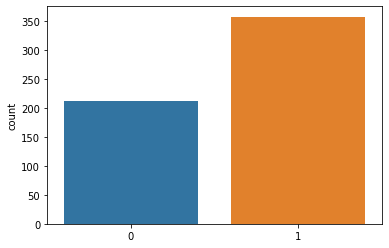

In [53]:
import seaborn as sns

sns.countplot(x=y);

데이터의 라벨 수가 불균형하다.

In [54]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [55]:
df = pd.DataFrame(X, columns=bc.feature_names)
df["label"] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [57]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### (4) train, test 데이터 분리

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [59]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

### (5) 다양한 모델로 학습

#### Decision Tree

In [60]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        42
           1       0.97      0.90      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



#### Random Forest

In [61]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### SVM

In [62]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### SGD Classifier

In [63]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



#### Logistic Regression

In [64]:
lr = LogisticRegression(max_iter=4000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### (6) 모델 평가

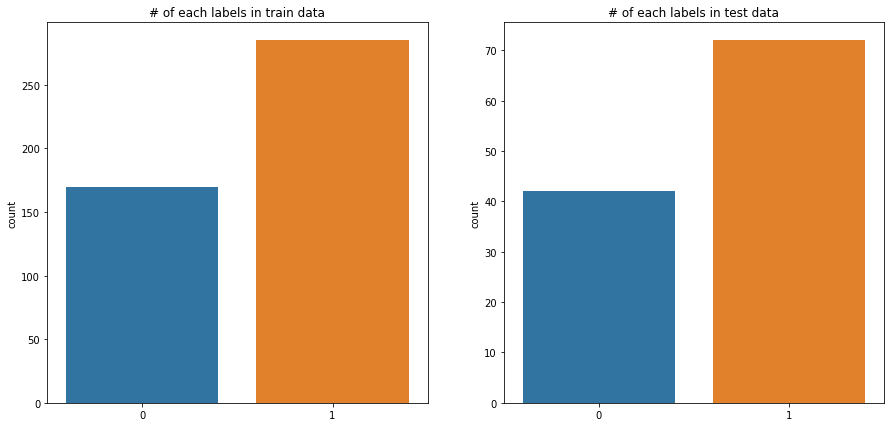

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].set_title("# of each labels in train data")
sns.countplot(x=y_train, ax=axes[0]);\
axes[1].set_title("# of each labels in test data")
sns.countplot(x=y_test, ax=axes[1]);

데이터 라벨의 수가 불균형하므로 `f1-score`를 사용한다.

In [66]:
# f1-score 불러오기
from sklearn.metrics import f1_score

#### Decision Tree

In [67]:
print(f'F1 Score of Decision Tree: {f1_score(y_test, y_pred_dt)}')

F1 Score of Decision Tree: 0.9352517985611511


#### Random Forest

In [68]:
print(f'F1 Score of Random Forest: {f1_score(y_test, y_pred_rf)}')

F1 Score of Random Forest: 0.9793103448275863


#### SVM

In [69]:
print(f'F1 Score of SVM: {f1_score(y_test, y_pred_svm)}')

F1 Score of SVM: 0.9659863945578231


#### SGD Classifier

In [70]:
print(f'F1 Score of SGD Classifier: {f1_score(y_test, y_pred_sgd)}')

F1 Score of SGD Classifier: 0.9571428571428572


#### Logistic Regression

In [71]:
print(f'F1 Score of Logistic Regression: {f1_score(y_test, y_pred_lr)}')

F1 Score of Logistic Regression: 0.9863013698630138


## 배운 점

- 데이터의 형태에 따라 같은 모델이어도 성능이 다르게 나올 수 있다.
- 데이터에 따라 사용해야 하는 평가 지표가 다르다.